In [2]:
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.optimize as optimize;

In [3]:
material = "Free";
MoX = SC.TMDmonolayerSC(material=material);

mu = 0.2;
Delta0 = 0.001;
hwc = Delta0*20.0;
res = 1500;
SOIs = np.linspace(0.0, Delta0/2, 32);

%matplotlib widget

Hcs = [];
for SOI in SOIs:
    MoX.b = SOI;
    print("Now evaluating for fso={0:.3f}*Delta0".format(SOI/Delta0), end='\r');
    ksplus, ksmin = MoX.generate_ks(mu, hwc, res);
    V = MoX.Vint(mu, ksplus, ksmin, Delta0);
    Hcs.append(MoX.findHc(mu, Delta0, ksplus, ksmin, V, maxfactor=3.0, reltol=1e-11, transition=1e-2));
    
plt.plot(SOIs/Delta0, np.sqrt(2)*np.array(Hcs)/Delta0);
plt.xlabel(r"$\Delta_{so} / \Delta_{0}$");
plt.ylabel(r"$H_{C} / H_{P}$");

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [2]:
# Upper bound at Delta_so / Delta_0 = 0.2 

material = "Free";
MoX = SC.TMDmonolayerSC(material=material);

mu = 0.2;
Delta0 = 0.001;
hwc = Delta0*20.0;
res = 1500;
SOIs = np.linspace(0.0, Delta0/5, 50);

%matplotlib widget

Hcs = [];
for SOI in SOIs:
    MoX.b = SOI;
    print("Now evaluating for fso={0:.3f}*Delta0".format(SOI/Delta0), end='\r');
    ksplus, ksmin = MoX.generate_ks(mu, hwc, res);
    V = MoX.Vint(mu, ksplus, ksmin, Delta0);
    Hcs.append(MoX.findHc(mu, Delta0, ksplus, ksmin, V, maxfactor=3.0, reltol=1e-11, transition=1e-2));
    
plt.plot(SOIs/Delta0, np.sqrt(2)*np.array(Hcs)/Delta0);
plt.xlabel(r"$\Delta_{so} / \Delta_{0}$");
plt.ylabel(r"$H_{C} / H_{P}$");

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[0.54939518 0.00570456 0.99950016]


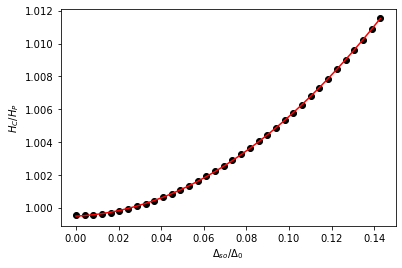

In [34]:
# fit flat-like section with second degree polynomial.

x = SOIs[0:36]/Delta0; y = np.sqrt(2)*np.array(Hcs[0:36])/Delta0;
p = np.polyfit(x,y,2); print(p);

%matplotlib inline

plt.plot(x, y, 'ko', x, p[0]*x**2 + p[1]*x + p[2], 'r-');
plt.xlabel(r"$\Delta_{so} / \Delta_{0}$");
plt.ylabel(r"$H_{C} / H_{P}$");

In [29]:
# save fit data:

import json;

with open('results/smallSOI_data', 'w+') as f:
    json.dump({"x": list(x), "y": list(y)}, f);

In [4]:
# load fit data:

import json;

with open('results/smallSOI_data', 'r') as f:
    d = json.load(f);

x = np.array(d['x']); y = np.array(d['y']);

pf = [0.58670384 0.99965021], pg = [0.2125777  0.34441367 0.9995889 ]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
def f(x, A, C):
    return A*x**2 + C;
def g(x, A, B, C):
    return A * x**2 / (x**2 + B) + C;

%matplotlib widget

pf = optimize.curve_fit(f, x, y, p0=[0.5, 1.0])[0];
pg = optimize.curve_fit(g, x, y, p0=[0.5, 1.0, 1.0])[0];

print("pf = {}, pg = {}".format(pf, pg));

plt.plot(x, y, 'ko', x, f(x, *pf), 'r-', x, g(x, *pg), 'b-');

pf = [0.58670384 0.99965021], pg = [0.2125777  0.34441367 0.9995889 ]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …